In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [4]:
df = pd.read_csv("../Ignatieva/data/raw/test_scores.csv")

In [6]:
df.head()

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,6OL,Standard,20.0,2FHT3,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,6OL,Standard,20.0,3JIVH,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,6OL,Standard,20.0,3XOWE,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,6OL,Standard,20.0,556O0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,6OL,Standard,20.0,74LOE,Male,Does not qualify,64.0,76.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           1984 non-null   object 
 1   school_setting   1984 non-null   object 
 2   school_type      1984 non-null   object 
 3   classroom        1984 non-null   object 
 4   teaching_method  1984 non-null   object 
 5   n_student        1984 non-null   float64
 6   student_id       1984 non-null   object 
 7   gender           1984 non-null   object 
 8   lunch            1984 non-null   object 
 9   pretest          1984 non-null   float64
 10  posttest         1984 non-null   float64
dtypes: float64(3), object(8)
memory usage: 170.6+ KB


In [23]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
school,1984,23,GOOBU,147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_setting,1984,3,Urban,841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
school_type,1984,2,Public,1463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
classroom,1984,97,ZBH,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teaching_method,1984,2,Standard,1274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_student,1984.0,NaN,NaN,NaN,22.769153,4.248477,14.0,20.0,22.0,27.0,31.0
student_id,1984,1984,2FHT3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1984,2,Male,1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1984,2,Does not qualify,1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pretest,1984.0,NaN,NaN,NaN,54.980847,13.558027,22.0,44.0,56.0,65.0,93.0


['Female' 'Male']
[67.07502569373072, 67.1730959446093]


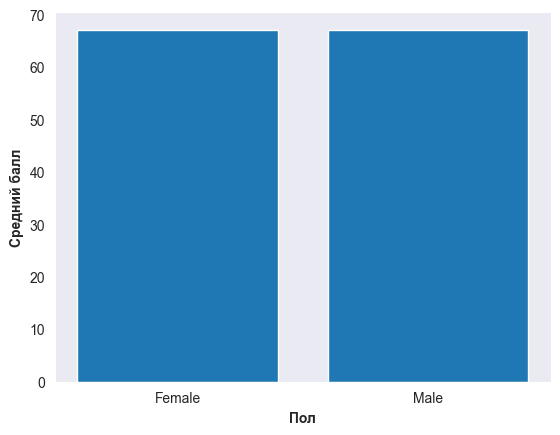

In [78]:
fig, ax = plt.subplots()
gens = df['gender'].unique()
counts = []
for gen in gens:
    counts.append(df['posttest'].loc[df['gender'] == gen].mean())
print(gens)
print(counts)
ax.bar(gens, counts)
plt.xlabel('Пол', fontweight='bold')
plt.ylabel('Средний балл', fontweight='bold')
plt.grid()
plt.show()

0       62.0
1       66.0
2       64.0
3       61.0
4       64.0
        ... 
1979    39.0
1980    39.0
1981    38.0
1982    46.0
1983    41.0
Name: pretest, Length: 1984, dtype: float64
0       72.0
1       79.0
2       76.0
3       77.0
4       76.0
        ... 
1979    50.0
1980    55.0
1981    46.0
1982    53.0
1983    48.0
Name: posttest, Length: 1984, dtype: float64
[54, 48, 46, 53, 46, 48, 60, 46, 53, 53, 46, 48, 69, 46, 46, 43, 60, 46, 69, 69, 43, 43, 51, 58, 69, 69, 48, 58, 48, 69, 58, 43, 69, 53, 53, 58, 54, 69, 53, 46, 58, 58, 58, 54, 58, 58, 58, 60, 60, 58, 53, 55, 48, 46, 60, 60, 48, 43, 43, 28, 27, 46, 54, 15, 24, 58, 48, 48, 48, 58, 60, 46, 58, 28, 58, 53, 60, 54, 25, 60, 54, 60, 58, 60, 48, 58, 69, 46, 27, 60, 24, 22, 14, 25, 24, 24, 46, 31, 24, 31, 24, 28, 31, 15, 31, 31, 38, 55, 69, 58, 55, 55, 51, 57, 44, 54, 58, 48, 58, 57, 43, 46, 43, 43, 48, 58, 53, 60, 46, 53, 22, 46, 58, 58, 53, 54, 58, 28, 58, 69, 69, 54, 58, 54, 48, 58, 58, 69, 46, 55, 53, 53, 53, 46, 53, 51, 

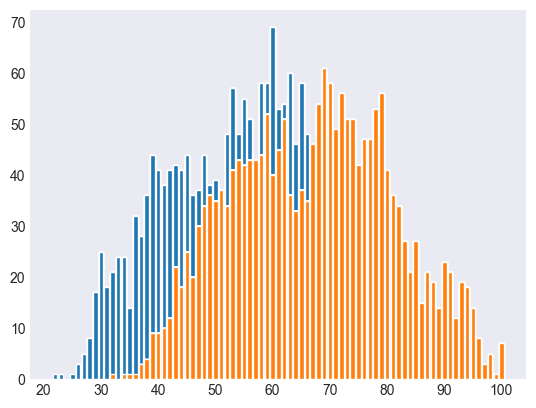

In [97]:
fig, ax = plt.subplots()
pre_values = df['pretest']
post_values = df['posttest']
pretest_counts = []
posttest_counts = []
for value in pre_values:
    pretest_counts.append(df['pretest'].loc[df['pretest'] == value].count())
for value in post_values:
    posttest_counts.append(df['posttest'].loc[df['posttest'] == value].count())
print(pre_values)
print(post_values)
print(pretest_counts)
print(posttest_counts)
ax.bar(pre_values, pretest_counts)
ax.bar(post_values, posttest_counts)
plt.grid()
plt.show()

['Urban' 'Suburban' 'Rural']


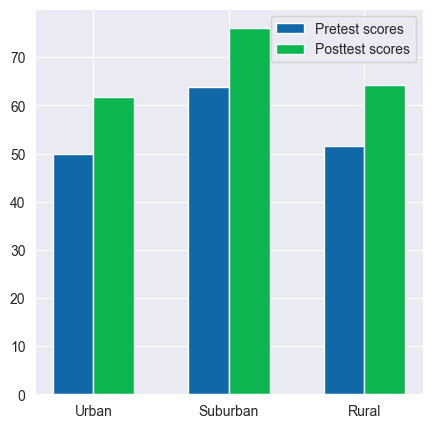

In [89]:
plt.figure(figsize=(5,5))
barWidth = 0.3
settings = df['school_setting'].unique()
avr_pre = []
for setting in settings:
    avr_pre.append(df['pretest'].loc[df['school_setting'] == setting].mean())
avr_post = []
for setting in settings:
    avr_post.append(df['posttest'].loc[df['school_setting'] == setting].mean())
pos1 = np.arange(len(avr_pre))
pos2 = [x + barWidth for x in pos1]
plt.bar(pos1, avr_pre, color='#1168A8', width=barWidth, label='Pretest scores')
plt.bar(pos2, avr_post, color='#0DB750', width=barWidth, label='Posttest scores')
print(settings)
plt.xticks([i-0.15 + barWidth for i in range(len(avr_pre))], ['Urban', 'Suburban', 'Rural'])

plt.legend()
plt.show()

['Non-public' 'Public']


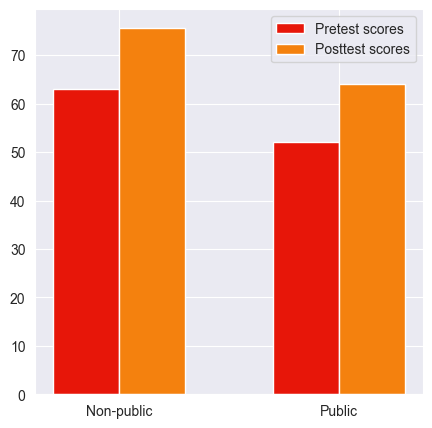

In [88]:
plt.figure(figsize=(5,5))
barWidth = 0.3
types = df['school_type'].unique()
avr_pre = []
for type in types:
    avr_pre.append(df['pretest'].loc[df['school_type'] == type].mean())
avr_post = []
for type in types:
    avr_post.append(df['posttest'].loc[df['school_type'] == type].mean())
pos1 = np.arange(len(avr_pre))
pos2 = [x + barWidth for x in pos1]
plt.bar(pos1, avr_pre, color='#E71609', width=barWidth, label='Pretest scores')
plt.bar(pos2, avr_post, color='#F4810E', width=barWidth, label='Posttest scores')
print(types)
plt.xticks([i-0.15 + barWidth for i in range(len(avr_pre))], ['Non-public', 'Public'])

plt.legend()
plt.show()

['Standard' 'Experimental']


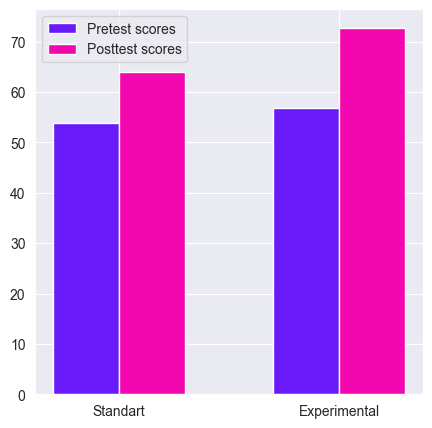

In [90]:
plt.figure(figsize=(5,5))
barWidth = 0.3
methods = df['teaching_method'].unique()
avr_pre = []
for method in methods:
    avr_pre.append(df['pretest'].loc[df['teaching_method'] == method].mean())
avr_post = []
for method in methods:
    avr_post.append(df['posttest'].loc[df['teaching_method'] == method].mean())
pos1 = np.arange(len(avr_pre))
pos2 = [x + barWidth for x in pos1]
plt.bar(pos1, avr_pre, color='#681AF9', width=barWidth, label='Pretest scores')
plt.bar(pos2, avr_post, color='#F307AF', width=barWidth, label='Posttest scores')
print(methods)
plt.xticks([i-0.15 + barWidth for i in range(len(avr_pre))], ['Standart', 'Experimental'])

plt.legend()
plt.show()

['Does not qualify' 'Qualifies for reduced/free lunch']


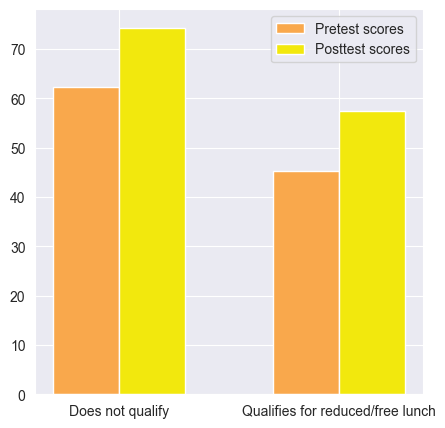

In [93]:
plt.figure(figsize=(5,5))
barWidth = 0.3
lunchs = df['lunch'].unique()
avr_pre = []
for lunch in lunchs:
    avr_pre.append(df['pretest'].loc[df['lunch'] == lunch].mean())
avr_post = []
for lunch in lunchs:
    avr_post.append(df['posttest'].loc[df['lunch'] == lunch].mean())
pos1 = np.arange(len(avr_pre))
pos2 = [x + barWidth for x in pos1]
plt.bar(pos1, avr_pre, color='#F9A84C', width=barWidth, label='Pretest scores')
plt.bar(pos2, avr_post, color='#F2E80D', width=barWidth, label='Posttest scores')
print(lunchs)
plt.xticks([i-0.15 + barWidth for i in range(len(avr_pre))], ['Does not qualify', 'Qualifies for reduced/free lunch'])

plt.legend()
plt.show()